# Research Findings & Insights

In this notebook, we move from **exploratory and statistical analysis** to the **presentation of final results**.  
The goal here is not to show the technical modeling steps (already covered in earlier notebooks), but to provide a **clear, visually compelling, and stakeholder-friendly summary** of our findings.

The structure of this notebook follows our **research questions (RQs)** directly.  
For each RQ, we present:
- a **visualization** that highlights the key insight, and  
- a **concise interpretation** that connects the results back to the broader context.  

This approach ensures that results are **accessible, presentation-ready, and easy to communicate** in both written and oral formats.


## Load the data

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_hex
import pandas as pd
import numpy as np
import plotly.express as px

In [19]:
# Load datasets
df_all_years = pd.read_csv('../data/processed/world-happiness-historical-all.csv') # full cleaned hist. dataset
df_all_years_region = pd.read_csv('../data/processed/world-happiness-historical-region.csv') # cleaned hist. dataset restricted to countries with valid regional mapping 
df_2024 = pd.read_csv('../data/processed/world-happiness-2024.csv') # complete 2024 dataset
df_2024_model = pd.read_csv('../data/processed/world-happiness-2024-model.csv') # 2024 dataset cleaned for regression  

# Quick sanity check
print('df_all_years shape:', df_all_years.shape)
print('df_all_years_region shape:', df_all_years_region.shape)
print('df_2024 shape:', df_2024.shape)
print('df_2024_model shape:', df_2024_model.shape)

df_all_years shape: (2336, 12)
df_all_years_region shape: (2228, 12)
df_2024 shape: (143, 12)
df_2024_model shape: (140, 12)


In [194]:
# ===============================================
# Universal Plot Palette for Happiness Analysis
# ===============================================

# Continuous happiness gradient (for lines, maps, rankings)
# From unhappy (dark blue) → mid (light blue) → happy (orange/yellow)
happiness_cmap = ["#0D3B66", "#4B79A1", "#F2B366", "#F28E2B"]

# Highlighted regions / countries (ordered list: bottom1, bottom2, top2, top1)
highlight_colors = ["#5A3E78", "#A07FA0", "#F2B366", "#F28E2B"]

# Global average / reference line
global_avg_color = "#AFAFAF"  # subtle grey for comparison

# Non-highlighted regions / background lines
grey_line = "#D3D3D3"

# Factor bars (single-color gradient, muted professional)
factor_bar_colors = ["#A1A1A1", "#7D7D7D"]  # light → dark grey

# Axes, labels, and text
axis_color = "#4D4D4D"
title_color = "#4D4D4D"

# Highlight color for annotations (separate from happiness scale)
annotation_color = "#3CB6A1"  # teal for highlights

# Optional: background
background_color = "#F9F9F9"


## RQ1 - How have global and regional happiness levels evolved over time? 

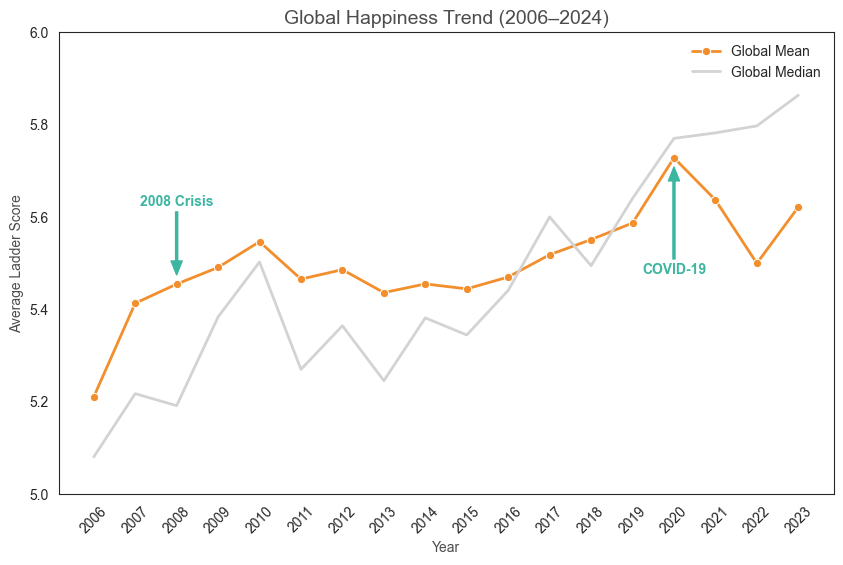

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure global_mean and global_median are DataFrames
global_mean = df_all_years_region.groupby('year', as_index=False)['Ladder score'].mean()
global_median = df_all_years_region.groupby('year', as_index=False)['Ladder score'].median()

plt.figure(figsize=(10,6))
sns.set_style("white")  # remove grid

# Plot mean line (bright orange)
sns.lineplot(
    data=global_mean,
    x='year', y='Ladder score',
    marker='o', linewidth=2,
    color=happiness_cmap[3],  # brightest happy color
    label='Global Mean'
)

# Plot median line (grey, stays in background)
sns.lineplot(
    data=global_median,
    x='year', y='Ladder score',
    linewidth=2, color=grey_line,
    label='Global Median'
)

# X-axis formatting
plt.xticks(global_mean['year'], rotation=45)
plt.ylabel('Average Ladder Score', color=axis_color)
plt.xlabel('Year', color=axis_color)
plt.title('Global Happiness Trend (2006–2024)', fontsize=14, color=axis_color)
plt.ylim(5,6)

# Arrow annotations using annotation_color (teal)
highlight_arrow_color = annotation_color

# First arrow (2008) from above
year1, y1 = 2008, global_mean.loc[global_mean['year']==2008, 'Ladder score'].values[0]
plt.annotate(
    '2008 Crisis',
    xy=(year1, y1+0.02),
    xytext=(year1, y1+0.17),
    ha='center',
    color=highlight_arrow_color,
    fontweight='bold',
    arrowprops=dict(
        facecolor=highlight_arrow_color,
        edgecolor=highlight_arrow_color,
        shrink=0,
        width=1.5,
        headwidth=8,
        headlength=10
    )
)

# Second arrow (2020) from below
year2, y2 = 2020, global_mean.loc[global_mean['year']==2020, 'Ladder score'].values[0]
plt.annotate(
    'COVID-19',
    xy=(year2, y2-0.02),
    xytext=(year2, y2-0.25),
    ha='center',
    color=highlight_arrow_color,
    fontweight='bold',
    arrowprops=dict(
        facecolor=highlight_arrow_color,
        edgecolor=highlight_arrow_color,
        shrink=0,
        width=1.5,
        headwidth=8,
        headlength=10
    )
)

# Legend
plt.legend(frameon=False)
plt.show()


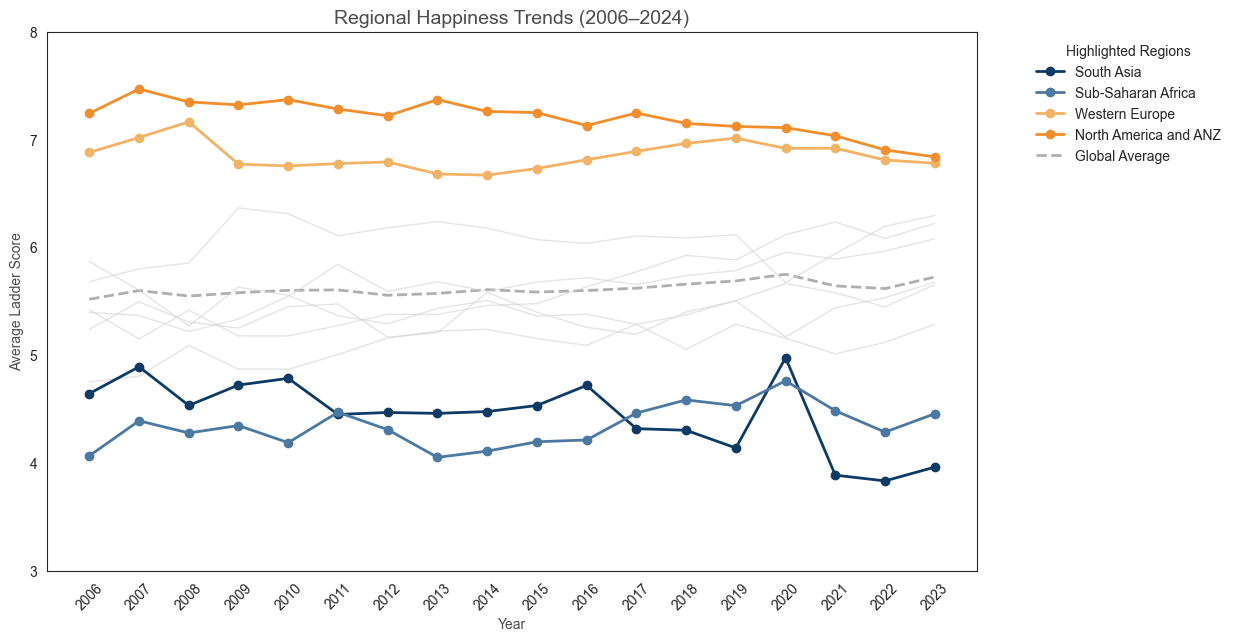

In [201]:
plt.figure(figsize=(12,7))
sns.set_style("white")  # grid off

# Highlight colors based on happiness_cmap
highlight_colors_gradient = [
    happiness_cmap[0],  # bottom1 - dark blue
    happiness_cmap[1],  # bottom2 - light blue
    happiness_cmap[2],  # top2 - muted orange
    happiness_cmap[3]   # top1 - bright orange
]

# Plot non-highlighted regions in muted grey
for region in regional_trend['Regional indicator'].unique():
    if region not in highlight_regions:
        subset = regional_trend[regional_trend['Regional indicator']==region]
        plt.plot(subset['year'], subset['Ladder score'],
                 color=grey_line, linewidth=1, alpha=0.6, zorder=1)

# Plot highlighted regions with happiness gradient
for i, region in enumerate(highlight_regions):  # [bottom1, bottom2, top2, top1]
    subset = regional_trend[regional_trend['Regional indicator']==region]
    plt.plot(subset['year'], subset['Ladder score'],
             marker='o', linewidth=2,
             label=region,
             color=highlight_colors_gradient[i],
             zorder=2)

# Global average trend line
global_mean_trend = regional_trend.groupby('year')['Ladder score'].mean().reset_index()
plt.plot(global_mean_trend['year'], global_mean_trend['Ladder score'],
         color=global_avg_color,
         linewidth=2, linestyle='--',
         label='Global Average',
         zorder=0)

# Axis formatting
plt.xticks(regional_trend['year'].unique(), rotation=45)
plt.ylabel('Average Ladder Score', color=axis_color)
plt.xlabel('Year', color=axis_color)
plt.title('Regional Happiness Trends (2006–2024)', fontsize=14, color=axis_color)
plt.ylim(3,8)

# Legend
plt.legend(title='Highlighted Regions', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.show()


In [192]:
def plot_map(year):
    if year == 2024:
        df_year = df_2024.copy()
    else:
        df_year = df_all_years_region[df_all_years_region['year'] == year]
    
    fig = px.choropleth(
        df_year,
        locations='Country name',
        locationmode='country names',
        color='Ladder score',
        color_continuous_scale=happiness_cmap,  # use updated universal palette
        range_color=(3,8),
        title=f'Happiness Distribution in {year}',
    )
    
    fig.update_geos(showcoastlines=False, showland=True, fitbounds='locations')
    fig.update_layout(
        coloraxis_colorbar=dict(
            title="Ladder Score",
            tickvals=[3,4,5,6,7,8]
        ),
        title_font=dict(size=16, color=axis_color),
        font=dict(color=axis_color)
    )
    
    return fig

# Example usage
fig_2006 = plot_map(2006)
fig_2014 = plot_map(2014)
fig_2024 = plot_map(2024)

fig_2006.show()
fig_2014.show()
fig_2024.show()


/var/folders/fh/8172dclx5cz0z2826zl214xc0000gn/T/ipykernel_61832/3878945334.py:7: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

/var/folders/fh/8172dclx5cz0z2826zl214xc0000gn/T/ipykernel_61832/3878945334.py:7: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

/var/folders/fh/8172dclx5cz0z2826zl214xc0000gn/T/ipykernel_61832/3878945334.py:7: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `l

## RQ2 - To what extent did major global events affect reported happiness levels (e.g., COVID pandemic)? 

## RQ3 - Which countries rank among the top 5 and bottom 5 in reported happiness levels in 2024? 

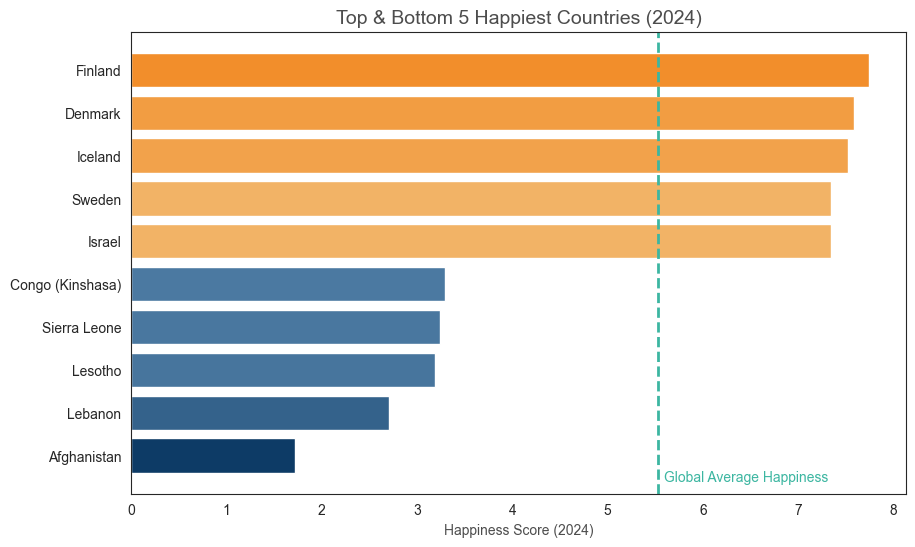

In [153]:
# --- RQ3: Top & bottom 5 countries in 2024 ---
df_top_bottom = df_2024.sort_values('Ladder score', ascending=False)

top5 = df_top_bottom.head(5).copy()
top5['Group'] = 'Happiest'
bottom5 = df_top_bottom.tail(5).copy()
bottom5['Group'] = 'Unhappiest'

df_extremes = pd.concat([top5, bottom5])

plt.figure(figsize=(10,6))
sns.set_style("white")

# Function to interpolate colors along the gradient
def interpolate_colors(values, cmap_colors):
    cmap = LinearSegmentedColormap.from_list("tmp_cmap", cmap_colors)
    norm = (values - values.min()) / (values.max() - values.min())
    return [to_hex(cmap(x)) for x in norm]

# Separate top/bottom groups
bottom_values = df_extremes[df_extremes['Group']=='Unhappiest']['Ladder score']
top_values = df_extremes[df_extremes['Group']=='Happiest']['Ladder score']

# Interpolated colors along the gradient
bottom_colors = interpolate_colors(bottom_values, [happiness_cmap[0], happiness_cmap[1]])  # dark → mid
top_colors = interpolate_colors(top_values, [happiness_cmap[2], happiness_cmap[3]])          # mid → bright

# Assign colors per row
df_extremes['color'] = df_extremes.apply(
    lambda row: top_colors[top_values.tolist().index(row['Ladder score'])] if row['Group']=='Happiest' 
                else bottom_colors[bottom_values.tolist().index(row['Ladder score'])],
    axis=1
)

# Plot bars manually to apply per-bar colors
for idx, row in df_extremes.iterrows():
    plt.barh(row['Country name'], row['Ladder score'], color=row['color'])

# Global average line in teal
global_mean = df_top_bottom['Ladder score'].mean()
plt.axvline(global_mean, color=annotation_color, linestyle='--', linewidth=2)

# Inline legend text next to line
plt.text(global_mean + 0.06, 9.5,  
         'Global Average Happiness', 
         color=annotation_color,
         va='center', ha='left', rotation=0, fontsize=10)

# Axis formatting
plt.xlabel("Happiness Score (2024)", color=axis_color)
plt.ylabel("")
plt.title("Top & Bottom 5 Happiest Countries (2024)", fontsize=14, color=axis_color)
plt.gca().invert_yaxis()  # top countries on top
plt.show()


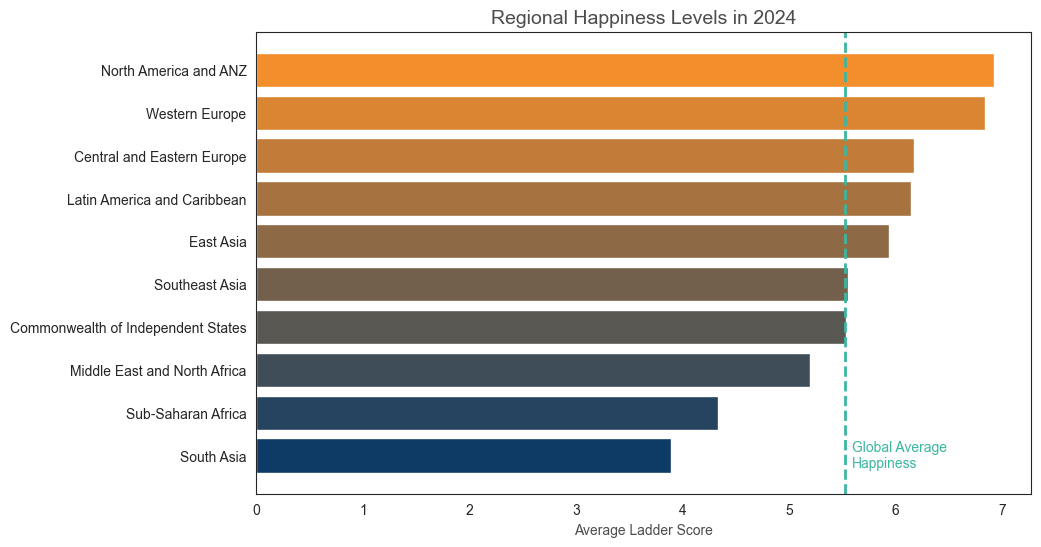

In [187]:
# --- Regional Happiness Levels in 2024 ---
df_2024_copy = df_2024.copy()
df_2024_copy.columns = ['Country name', 'Regional_indicator', 'Ladder_score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual']
df_region_2024 = df_2024_copy.groupby('Regional_indicator', as_index=False)['Ladder_score'].mean()

# Sort descending so happiest is on top after invert_yaxis()
df_region_sorted = df_region_2024.sort_values('Ladder_score', ascending=False)

plt.figure(figsize=(10,6))
sns.set_style("white")

# Create gradient: dark blue → bright orange
n = len(df_region_sorted)
cmap = LinearSegmentedColormap.from_list("region_gradient", [happiness_cmap[-1], happiness_cmap[0]])  # dark blue → bright orange
bar_colors = [to_hex(cmap(v)) for v in np.linspace(0, 1, n)]

# Plot bars manually to apply per-bar colors and remove borders
for idx, row in enumerate(df_region_sorted.itertuples(index=False)):
    plt.barh(row.Regional_indicator, row.Ladder_score, color=bar_colors[idx], edgecolor=None)  # row._1 = 'Regional indicator'

# Global average line in teal
global_mean = df_2024_copy['Ladder_score'].mean()
plt.axvline(global_mean, color=annotation_color, linestyle='--', linewidth=2)
plt.text(global_mean + 0.06, 9, 'Global Average\nHappiness', color=annotation_color, va='center', ha='left', fontsize=10)

# Axis formatting
plt.title('Regional Happiness Levels in 2024', fontsize=14, color=axis_color)
plt.xlabel('Average Ladder Score', color=axis_color)
plt.ylabel('')
plt.gca().invert_yaxis()  # top = happiest
plt.show()


## RQ4 - Which factors are most strongly associated with happiness across countries in 2024? 

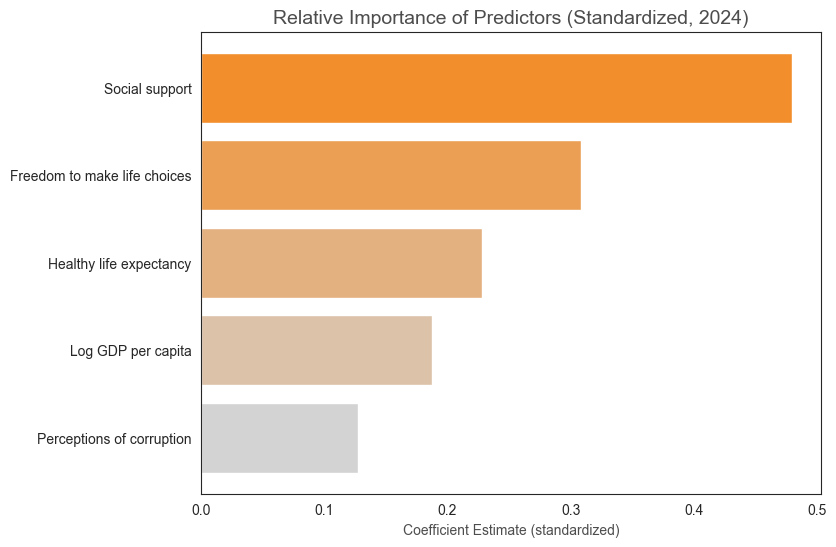

In [189]:
# Filter out Generosity
results_filtered = results[results['Variable'] != 'Generosity']
results_sorted = results_filtered.sort_values('Coefficient', ascending=True)

plt.figure(figsize=(8,6))
sns.set_style("white")  # grid off

# Interpolate colors from muted grey → brightest orange
n = len(results_sorted)
cmap = LinearSegmentedColormap.from_list("grey_to_orange", [grey_line, happiness_cmap[-1]])
bar_colors = [to_hex(cmap(v)) for v in np.linspace(0, 1, n)]

# Plot bars manually using enumerate
for idx, (_, row) in enumerate(results_sorted.iterrows()):
    plt.barh(row['Variable'], row['Coefficient'], color=bar_colors[idx], edgecolor=None)

# Zero line
plt.axvline(0, color=grey_line, linestyle='--', linewidth=1.5)

# Titles & labels
plt.title('Relative Importance of Predictors (Standardized, 2024)', fontsize=14, color=axis_color)
plt.xlabel('Coefficient Estimate (standardized)', color=axis_color)
plt.ylabel('')

plt.show()


**Interpretation:**  
This chart shows the standardized regression coefficients for key predictors of happiness in 2024.  
- A higher coefficient means the variable is more strongly associated with reported happiness (Ladder score), holding other factors constant.  
- Positive coefficients indicate a positive relationship (e.g., more social support → higher happiness).  
- Negative coefficients indicate an inverse relationship.  

Generosity was excluded from the plot because it was not statistically significant in our model, meaning its contribution to explaining differences in happiness is negligible.


## RQ5 - Which regions and countries stand out in the 2024 dataset relative to the global distribution? 

In [191]:
# Ensure 'year' is numeric
df_all_years['year'] = df_all_years['year'].astype(int)

# Sort the dataframe by year (important for animation order)
df_all_years = df_all_years.sort_values('year')

# Define custom happiness gradient for Plotly
custom_scale = [
    (0.0, happiness_cmap[0]),  # dark blue (unhappy)
    (0.5, happiness_cmap[1]),  # mid blue
    (0.75, happiness_cmap[2]), # light orange
    (1.0, happiness_cmap[3])   # bright orange (happy)
]

# Create interactive choropleth map
fig = px.choropleth(
    df_all_years,
    locations="Country name",
    locationmode="country names",
    color="Ladder score",
    animation_frame="year",
    color_continuous_scale=custom_scale,
    range_color=[df_all_years["Ladder score"].min(), df_all_years["Ladder score"].max()],
    title="World Happiness (Ladder Score) Over Years"
)

# Update layout
fig.update_layout(
    coloraxis_colorbar=dict(title="Ladder Score"),
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()


/var/folders/fh/8172dclx5cz0z2826zl214xc0000gn/T/ipykernel_61832/3988808117.py:16: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

